In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import yfinance

raw_data = yfinance.download (tickers = "^GSPC", start = "2010-01-04", 
                              end = "2023-05-03", interval = "1d")

[*********************100%***********************]  1 of 1 completed


<h1>CAPM Equation
$$ r = RFR + \beta \space (rm - RFR) $$

<br>
<br>
Prediction:    
$$ r_s = \beta \space r_m $$

<br>
<br>
$$We \space have \space stock \space return \space r_s \space and \space market \space return \space r_m$$    
    
<br> 
<br>
If only we had Beta ...
<br>    
<br>    

<h1>    
We get it via Regression    
$$ r_s = \beta \space r_m  + \alpha $$    
<br>
<br>
    

In [3]:
market = pd.DataFrame(raw_data['Adj Close'].pct_change())
market.columns=['market']
market.reset_index(inplace=True)
market['Date'] = pd.to_datetime(market['Date'])
market.set_index('Date', inplace=True)
market

,market
Date,
2010-01-04,NaN
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882
...,...
2023-04-26,-0.003841
2023-04-27,0.019566
2023-04-28,0.008253


In [4]:
import glob
path = '/Users/danielbarrera/Downloads/Market_Data/'
files = glob.glob(path+'*.csv')
for i in range(len(files)):
    f = files[i]
    ticker = f.split('/')[-1].split('_')[0]
    df = pd.read_csv(path+ticker+'_Mkt_Data.csv')
    temp = df[['date','Adjclose']]
    temp.columns = ['date',ticker]
    if i==0:
        prices = temp.copy()
    else:
        prices = prices.merge(temp, how='outer')
        


In [5]:
prices

,date,NVDA,REGN,MLM,AFL,ACN,NEM,ADP,CMI,RCL,...,CDAY,LOW,PEAK,HIG,LYV,CF,TSCO,AJG,GEN,NWSA
0,2010-01-04,4.241590,24.629999,78.161186,17.140190,32.836594,36.763706,27.336405,34.302223,21.679934,...,NaN,18.254616,14.052014,18.354069,9.120000,13.732217,11.444665,15.352902,7.003802,NaN
1,2010-01-05,4.303529,25.100000,77.103912,17.637430,33.039532,36.862358,27.189604,35.113361,21.755556,...,NaN,18.065441,14.014631,19.761774,9.350000,13.955006,11.324511,15.270389,6.965738,NaN
2,2010-01-06,4.331054,24.719999,79.022354,17.792355,33.390778,37.643913,27.125782,35.434891,21.209362,...,NaN,18.112740,13.930511,20.092552,9.950000,14.536654,11.300910,15.277267,6.988576,NaN
3,2010-01-07,4.246177,24.570000,78.314682,17.983328,33.359550,37.401104,27.113014,37.232586,21.595903,...,NaN,18.632946,14.122112,20.400238,9.700000,14.390121,11.455391,15.181017,6.973351,NaN
4,2010-01-08,4.255354,24.370001,77.018669,17.803177,33.226856,37.651497,27.074715,39.220261,21.772371,...,NaN,18.593534,14.215566,20.169477,9.640000,14.699631,11.448955,15.222260,6.992382,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,2023-04-27,272.260010,792.289978,358.049988,69.470001,275.450012,48.270000,216.160004,230.889999,61.660000,...,63.830002,204.529999,21.209999,69.910004,67.360001,70.110001,239.089996,209.050003,17.750000,17.150000
3352,2023-04-28,277.489990,801.789978,363.200012,69.849998,280.290009,47.400002,220.000000,235.039993,65.430000,...,63.480000,207.830002,21.969999,70.989998,67.779999,71.580002,238.399994,208.059998,17.670000,17.610001
3353,2023-05-01,289.100006,806.719971,367.369995,70.360001,279.420013,46.930000,221.119995,234.580002,66.980003,...,65.180000,208.220001,21.639999,71.279999,68.400002,71.949997,238.949997,210.520004,17.660000,17.370001
3354,2023-05-02,282.100006,798.450012,371.850006,68.639999,276.739990,48.060001,216.539993,227.639999,67.809998,...,63.459999,205.970001,21.180000,70.510002,67.750000,74.059998,241.949997,210.100006,16.930000,16.980000


In [6]:
#prices = prices.set_index('date')
rets = prices.set_index('date').pct_change().reset_index()
rets['date'] = pd.to_datetime(rets.reset_index()['date'])

In [7]:
market = rets.set_index('date').join(market)[['market']]

In [8]:
import capm_toolkit as cp

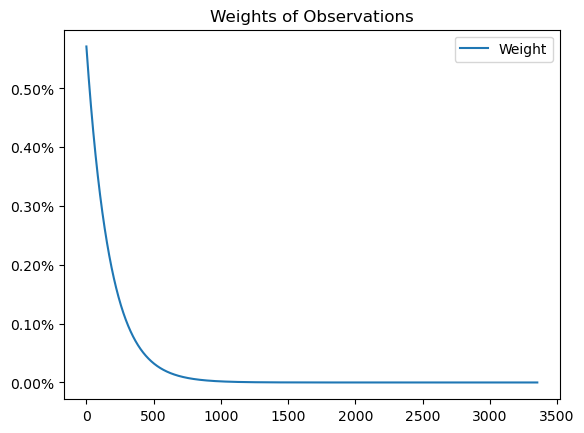

In [9]:
w = pd.DataFrame(100*cp.wexp(len(raw_data),121),columns=['Weight'])
import matplotlib.ticker as mtick

ax = w.plot(title='Weights of Observations');
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


In [10]:
rets

,date,NVDA,REGN,MLM,AFL,ACN,NEM,ADP,CMI,RCL,...,CDAY,LOW,PEAK,HIG,LYV,CF,TSCO,AJG,GEN,NWSA
0,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,0.014603,0.019082,-0.013527,0.029010,0.006180,0.002683,-0.005370,0.023647,0.003488,...,NaN,-0.010363,-0.002660,0.076697,0.025219,0.016224,-0.010499,-0.005374,-0.005435,NaN
2,2010-01-06,0.006396,-0.015139,0.024881,0.008784,0.010631,0.021202,-0.002347,0.009157,-0.025106,...,NaN,0.002618,-0.006002,0.016738,0.064171,0.041680,-0.002084,0.000450,0.003279,NaN
3,2010-01-07,-0.019597,-0.006068,-0.008955,0.010733,-0.000935,-0.006450,-0.000471,0.050732,0.018225,...,NaN,0.028720,0.013754,0.015313,-0.025126,-0.010080,0.013670,-0.006300,-0.002179,NaN
4,2010-01-08,0.002161,-0.008140,-0.016549,-0.010018,-0.003978,0.006695,-0.001413,0.053385,0.008171,...,NaN,-0.002115,0.006618,-0.011312,-0.006186,0.021509,-0.000562,0.002717,0.002729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,2023-04-27,0.010016,0.018368,0.039272,0.062395,0.015634,0.023754,0.025281,0.013431,0.035259,...,0.009649,0.018576,0.021184,0.021031,0.029655,-0.019715,-0.016859,0.017572,0.031377,0.030030
3352,2023-04-28,0.019210,0.011991,0.014384,0.005470,0.017571,-0.018024,0.017765,0.017974,0.061142,...,-0.005483,0.016135,0.035832,0.015448,0.006235,0.020967,-0.002886,-0.004736,-0.004507,0.026822
3353,2023-05-01,0.041839,0.006149,0.011481,0.007301,-0.003104,-0.009916,0.005091,-0.001957,0.023689,...,0.026780,0.001877,-0.015020,0.004085,0.009147,0.005169,0.002307,0.011824,-0.000566,-0.013629
3354,2023-05-02,-0.024213,-0.010251,0.012195,-0.024446,-0.009591,0.024078,-0.020713,-0.029585,0.012392,...,-0.026388,-0.010806,-0.021257,-0.010802,-0.009503,0.029326,0.012555,-0.001995,-0.041336,-0.022453


In [11]:
cp.calc_capm(rets[['NVDA','MSFT','WMT']].iloc[1:200,:],market.iloc[1:200]).loc['hbeta']

0    1.459974
1    0.877553
2    0.390068
Name: hbeta, dtype: float64

In [12]:
print (rets.columns[1:].to_list())

['NVDA', 'REGN', 'MLM', 'AFL', 'ACN', 'NEM', 'ADP', 'CMI', 'RCL', 'WMT', 'SNA', 'AMD', 'INVH', 'DE', 'BRK.B', 'KMI', 'MDLZ', 'WAB', 'CNP', 'VLO', 'HWM', 'XRAY', 'HAL', 'MPWR', 'NWL', 'PNR', 'MOS', 'WBD', 'UDR', 'GD', 'BA', 'HES', 'PARA', 'MAA', 'AWK', 'ANSS', 'BSX', 'LIN', 'SNPS', 'BBWI', 'PYPL', 'CEG', 'SLB', 'EPAM', 'J', 'TTWO', 'EFX', 'PG', 'CINF', 'ODFL', 'WFC', 'NWS', 'FMC', 'CZR', 'HAS', 'FICO', 'BXP', 'KR', 'WY', 'STLD', 'CAG', 'ABT', 'CDNS', 'BIO', 'TJX', 'NI', 'PCG', 'BKNG', 'VFC', 'KLAC', 'RE', 'DD', 'DLR', 'AME', 'PFE', 'MHK', 'AES', 'INTU', 'CSGP', 'BWA', 'CFG', 'IP', 'KEY', 'QRVO', 'AAPL', 'DHR', 'EA', 'MCD', 'TAP', 'ZBH', 'CSX', 'WEC', 'T', 'PTC', 'BBY', 'GNRC', 'EMN', 'DISH', 'OMC', 'ETSY', 'IBM', 'CTAS', 'OGN', 'CE', 'FAST', 'NTAP', 'TGT', 'PKI', 'CB', 'NTRS', 'BAX', 'BLK', 'RJF', 'TSN', 'NFLX', 'HST', 'ADI', 'AAL', 'IQV', 'ANET', 'BG', 'CSCO', 'GE', 'VRSK', 'K', 'AIZ', 'L', 'ILMN', 'VZ', 'VRTX', 'ARE', 'HSY', 'WYNN', 'ETR', 'JCI', 'JPM', 'FFIV', 'YUM', 'APTV', 'F', 'FT

In [15]:
#Build beta matrix
idx = rets.index[200:]
stocks = rets.columns[1:]
dates = rets.date.iloc[200:]
betas = rets.iloc[200:].set_index('date') * 0
for i_ in idx:
    betas.loc[dates[i_],stocks] = rets.iloc[i_-199:i_,:].fillna(0).sum()
    #cp.calc_capm(rets[stocks].iloc[i_-199:i_,:].fillna(0),market.iloc[i_-199:i_].fillna(0)).loc['hbeta'].values
    if i_ % 100 == 0:
        print (i_, end = ' ')


200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 

In [17]:
betas.to_pickle(path+'betas.pickle')

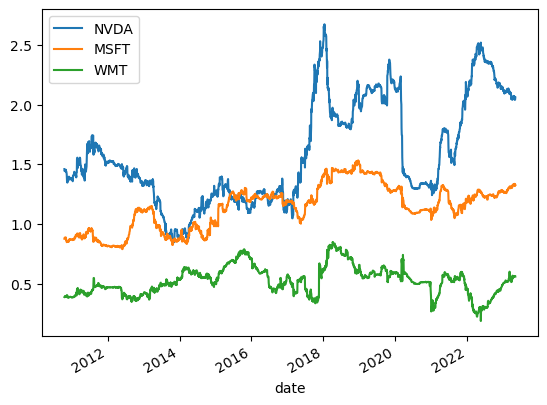

In [16]:
betas[['NVDA','MSFT','WMT']].plot();

In [31]:
#top 25 bottom 25 betas in the universe

port = betas * 0
for d_ in betas.index:
    top = betas.loc[d_].sort_values(ascending=False).head(25).index.to_list() 
    bottom = betas.loc[d_].sort_values(ascending=False).tail(25).index.to_list()
    port.loc[d_,top] *= -1
    port.loc[d_,bottom] *= 1

In [36]:
port.to_pickle(path+'portfolio1.pickle')

In [ ]:
#decide what weights to use in your portfolio
#according to its factor exposure or equal weighted?

$$forecast = Volatility * IC * Score$$